<a href="https://colab.research.google.com/github/ahmedelsayed968/Machine-learning-Algorithms/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
X = np.random.rand(5,5)
# print(X)

In [32]:
import copy
class PCA_E:
    def __init__(self,n_component):
        self.n_component = n_component
        self.weights_from_cov = None
        self.components  = None

    def fit_transform(self,A_mat):
        """
        :param A_mat: input matrix
        :return: n_components of this matrix after linear transformation
        """
        # Normalize the matrix about the mean
        X_centered = A_mat - A_mat.mean(axis=0)

        # compute the covariance-variance matrix of the Matrix
        cov_matrix = np.cov(X_centered.T)

        # compute the eigen values
        # compute the eigen vectors
        self.eigen_values,self.eigen_vectors = np.linalg.eig(cov_matrix)

        # sort the eigen vectors according to the highest eigen values
        self.eigen_values = self.eigen_values.T
        self.eigen_vectors = self.eigen_vectors.T
        
        # sort in decreasing order
        sorted_indices = np.argsort(self.eigen_values)[::-1]
        self.eigen_values = self.eigen_values[sorted_indices]
        self.eigen_vectors = self.eigen_vectors[sorted_indices]
        # choose the n_components of the eigen vectors
        self.components = self.eigen_vectors[0:self.n_component,:]

        # compute the new reduced features --> y = x.W
        new_features = np.dot(A_mat,self.components.T)
        return new_features
    
    def inverse_trasnform(self,reduced_mat):
      """
        :param A_mat: compressed matrix
        :return: the reconstracted data after compression
      """
      try:
          return np.dot(reduced_mat,self.components)
      except:
        raise Exception("Error")
              


In [33]:
pca = PCA_E(n_component=1)
X2d = pca.fit_transform(X)
X2d

array([[0.52451215],
       [0.30106671],
       [1.18149186],
       [1.10331205],
       [0.94486799]])

In [34]:
X

array([[0.47377511, 0.65618719, 0.22059753, 0.50277261, 0.22276819],
       [0.19163656, 0.42591566, 0.10579572, 0.3552231 , 0.50898051],
       [0.86013392, 0.42523096, 0.21262415, 0.98833773, 0.36250787],
       [0.74264183, 0.24056741, 0.26377175, 0.89701099, 0.49440099],
       [0.34671395, 0.18821166, 0.30297758, 0.9767644 , 0.4949987 ]])

In [35]:
pca.inverse_trasnform(X2d)


array([[ 0.31375572, -0.13700543,  0.07131837,  0.39042912,  0.01945893],
       [ 0.18009383, -0.07864026,  0.0409363 ,  0.22410388,  0.01116931],
       [ 0.70675166, -0.30861211,  0.16064848,  0.87946261,  0.0438323 ],
       [ 0.6599856 , -0.28819112,  0.1500183 ,  0.8212682 ,  0.0409319 ],
       [ 0.56520662, -0.24680467,  0.12847452,  0.7033278 ,  0.03505376]])

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
X3D = pca.fit_transform(X)


In [13]:
X3D

array([[ 0.286538  ],
       [ 0.50998345],
       [-0.37044171],
       [-0.2922619 ],
       [-0.13381784]])

In [ ]:
pca.explained_variance_ratio_

array([0.64530484, 0.21185378, 0.09751626])

## Automate the Number of selected components

In [ ]:
pca_2 = PCA()
pca_2.fit(X)
cumsum = np.cumsum(pca_2.explained_variance_ratio_)
# d = np.argmax(cumsum >= 0.95) + 1
d = np.argmax(cumsum >=0.95) +1
print(d)

3


In [ ]:
## specify the n_components indicating the
## ratio of variance you wish to preserve:

pca_3 = PCA(n_components=0.95)
x_reduced = pca_3.fit_transform(X)
x_reduced

array([[ 2.34512467e-01,  3.15105366e-01,  1.21104473e-01],
       [-2.77148122e-01, -2.89727559e-01, -2.22816785e-01],
       [-1.70500580e-04,  3.12120540e-01, -2.08607261e-01],
       [ 7.15605095e-01, -2.74566257e-01,  8.54170303e-02],
       [-6.72798939e-01, -6.29320905e-02,  2.24902542e-01]])

In [ ]:
cumsum

array([0.64530484, 0.85715862, 0.95467487, 1.        , 1.        ])

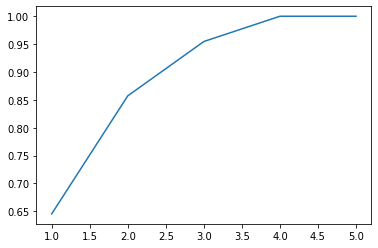

In [ ]:
plt.plot([1,2,3,4,5],list(cumsum))

## IPCA
used for large data set that consists of large instances that can not be cached on the memory so we have divide it into batches 

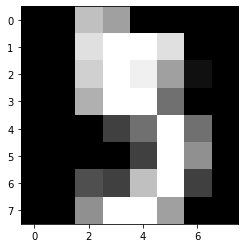

In [ ]:
from sklearn.datasets import load_digits
Xminst = load_digits(n_class=10)

plt.imshow(Xminst.images[5],cmap="gray")

In [ ]:

Xminst.data.shape

(1797, 64)

In [ ]:
Xminst.target.shape

(1797,)

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [ ]:
mnist.data.shape

(70000, 784)

In [ ]:
mnist.target.shape

(70000,)

In [ ]:
from sklearn.decomposition import IncrementalPCA
Xmnist = mnist.data
Ymnist = mnist.target

# divide the training set into batches and feed the IPCA
n_batches = 100
inc_pca = IncrementalPCA(n_components=160)
for X_batch in np.array_split(Xmnist,n_batches):
  inc_pca.partial_fit(X_batch)

x_reduced = inc_pca.transform(Xmnist)

In [ ]:
inc_pca.explained_variance_ratio_

array([0.09746115, 0.07155444, 0.0614953 , 0.05403383, 0.04888932,
       0.04305225, 0.03278259, 0.02889638, 0.02758361, 0.02342136,
       0.02106685, 0.02037549, 0.0170706 , 0.01694015, 0.01583378,
       0.01486339, 0.01319353, 0.01279007, 0.01187266, 0.0115293 ,
       0.01066032, 0.01009786, 0.00959142, 0.00909627, 0.00883278,
       0.00838808, 0.00809823, 0.00785706, 0.00740251, 0.00690005,
       0.00656132, 0.00645458, 0.00600804, 0.00585597, 0.00566737,
       0.00543455, 0.00504702, 0.00487061, 0.00478936, 0.00467575,
       0.0045435 , 0.00444897, 0.00418199, 0.00396139, 0.0038368 ,
       0.00375759, 0.00361402, 0.00348999, 0.00338704, 0.00319661,
       0.0031683 , 0.00310115, 0.00296445, 0.00287058, 0.00282478,
       0.00269389, 0.00268348, 0.00256469, 0.00253129, 0.00244605,
       0.00239657, 0.00238547, 0.00229192, 0.002209  , 0.00213017,
       0.00206266, 0.00202732, 0.00194977, 0.00191409, 0.00188488,
       0.00186907, 0.00180035, 0.00176726, 0.00173288, 0.00164

## Randomized PCA
This
is a stochastic algorithm that quickly finds an approximation of the first d principal
components. 

In [ ]:
rand_pca = PCA(n_components=160,svd_solver='randomized')
x_reduced  = rand_pca.fit_transform(Xmnist)

## Kernelized PCA
the same trick used in SVM can be applied in PCA to map the instance into high-dimentional space that turns out the complex prejections into simple projection in the higher space


In [ ]:
# from sklearn.datasets import make_swiss_roll
# swiss_roll  = make_swiss_roll(n_samples=1000)
# swiss_roll[1]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_swiss_roll
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X,y  = make_swiss_roll(n_samples=2000,noise=0.5)
y = y.astype(np.int64)
# xswiss = swiss_roll[0]
# yswiss = swiss_roll[1]
"""
a three-step pipeline, first scaling the data before pca,second reducing dimensionality to two dimensions
using kPCA, then applying Logistic Regression for classification. Then it uses Grid
SearchCV to find the best kernel and gamma value for kPCA in order to get the best
classification accuracy at the end of the pipeline
"""
# split the data into train/dev/test sets
X_train, x_,y_train, y_ = train_test_split(X,y ,
                                   random_state=365, 
                                   test_size=0.25, 
                                   shuffle=True)
x_cv , x_test , y_cv , y_test = train_test_split(x_,y_,test_size=0.5,
                                                 shuffle=True,
                                                 random_state=365)

# build the pipeline
clf = Pipeline([
    ('scaler',StandardScaler()),
    ("kpca",KernelPCA(n_components = 2)),
    ("log_reg",LogisticRegression())
])

# hyperparameters tuning
param_grid = [{
 "kpca__gamma": np.linspace(0.03, 0.05, 10),
 "kpca__kernel": ["rbf", "sigmoid"]
 }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X_train, y_train)



GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [ ]:
grid_search.best_params_

{'kpca__gamma': 0.05, 'kpca__kernel': 'rbf'}

In [ ]:
clf.steps = [('scaler',StandardScaler()),
             ('kpca',KernelPCA(n_components=2,gamma=0.05,kernel='rbf')),
             ("log_reg",LogisticRegression())]

In [ ]:
clf.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('scaler', StandardScaler()),
                ('kpca', KernelPCA(gamma=0.05, kernel='rbf', n_components=2)),
                ('log_reg', LogisticRegression())])>

In [ ]:
clf.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('kpca', KernelPCA(gamma=0.05, kernel='rbf', n_components=2)),
                ('log_reg', LogisticRegression())])

In [ ]:
clf.score(X_train,y_train)

0.5333333333333333

In [ ]:
clf.score(x_cv,y_cv)

0.532

## PCA For Compression

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
x_reduced  = pca.fit_transform(X)
x_decomp = pca.inverse_transform(x_reduced)
print('Data before compression:')
print(X)
print('\nData after Compression: ')
print(x_reduced)
print('\nData after reconstruction: ')
print(x_decomp)


Data before compression:
[[0.24579116 0.53324466 0.39213517 0.58284353 0.11956524]
 [0.00885199 0.66430359 0.27977762 0.95327234 0.36445206]
 [0.4068706  0.28420908 0.56959762 0.77012182 0.55481057]
 [0.80767529 0.83051933 0.9093186  0.1570085  0.3050098 ]
 [0.16535928 0.28051242 0.48880065 0.74620399 0.75545292]]

Data after Compression: 
[[-0.01116065 -0.29121334  0.17811185]
 [-0.42229809 -0.28657873 -0.14863897]
 [-0.10608692  0.25726732  0.08650304]
 [ 0.84645426  0.00120753 -0.07560437]
 [-0.3069086   0.31931723 -0.04037155]]

Data after reconstruction: 
[[ 0.27284201  0.53507273  0.39960691  0.61953068  0.10922677]
 [-0.01291105  0.66283287  0.27376643  0.92375667  0.3727696 ]
 [ 0.34230749  0.27984599  0.55176459  0.68255944  0.57948572]
 [ 0.80980316  0.83066313  0.90990634  0.15989438  0.30419655]
 [ 0.2225067   0.28437437  0.50458538  0.82370898  0.73361195]]
